In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import os
from pathlib import Path

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (21.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120895 files and direc

In [4]:
ship_df = pd.read_csv('/content/drive/MyDrive/예비프로젝트 전용 드라이브/csv모음(지우면 각오하시오)/선사코드.csv')
ship_df.head(5)

,NO.,CODE,NAME
0,1,ZUE,NEW ZEALAND UNIT EXPRESS
1,2,ZSK,ZSK
2,3,ZIM,ZIM ISRAEL NAVIGATION COMPANY
3,4,YYW,양양운수(주)
4,5,YSS,"YOUNG SUNG SHIPPING CO.,LTD"


In [5]:
code_col = ship_df["CODE"]
code_col

0      ZUE
1      ZSK
2      ZIM
3      YYW
4      YSS
      ... 
432    ADV
433    ACS
434    ACL
435    ABC
436    AAL
Name: CODE, Length: 437, dtype: object

In [6]:
code_col = ship_df["CODE"]

letter_frequency = {}

for code in code_col:
    for letter in code:
        if letter.isalpha():  # 알파벳인 경우만 처리
            letter = letter.lower()  # 모두 소문자로 변환하여 대소문자 구분 방지
            if letter in letter_frequency:
                letter_frequency[letter] += 1
            else:
                letter_frequency[letter] = 1

for letter in 'abcdefghijklmnopqrstuvwxyz':
    if letter not in letter_frequency:
        letter_frequency[letter] = 0

for letter, frequency in letter_frequency.items():
    print(f"{letter}: {frequency}회")

z: 5회
u: 14회
e: 55회
s: 196회
k: 62회
i: 41회
m: 86회
y: 27회
w: 31회
l: 120회
j: 30회
g: 32회
d: 48회
c: 122회
r: 29회
t: 57회
f: 28회
p: 43회
n: 58회
h: 40회
a: 75회
o: 43회
b: 42회
v: 8회
x: 7회
q: 3회


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50508 (\N{HANGUL SYLLABLE AL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48307 (\N{HANGUL SYLLABLE BES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


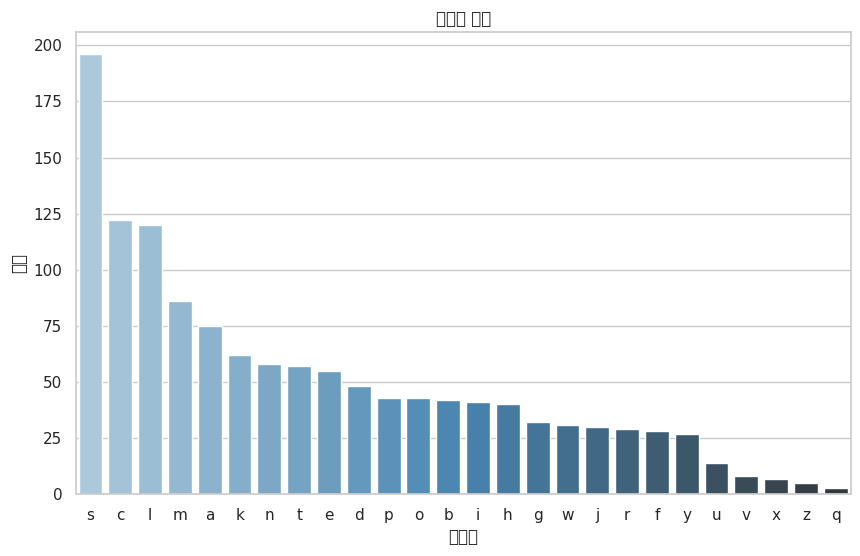

In [7]:
from matplotlib import font_manager, rc #코랩에서는 최상위의 적은 것을 쓰고 이런 식으로 작동시켜야 한다.
plt.rc('font', family='NanumBarunGothic') #설치한 폰트 지정

# 빈도를 기준으로 내림차순으로 정렬
sorted_letter_frequency = dict(sorted(letter_frequency.items(), key=lambda x: x[1], reverse=True))

# Seaborn을 사용한 막대 그래프 그리기
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_letter_frequency.keys()), y=list(sorted_letter_frequency.values()), palette="Blues_d")

plt.title("알파벳 빈도")
plt.xlabel("알파벳")
plt.ylabel("빈도")
plt.show()

In [8]:
letter_srs = pd.Series(letter_frequency)
print(letter_srs.describe())

count     26.000000
mean      50.076923
std       42.723224
min        3.000000
25%       28.250000
50%       41.500000
75%       57.750000
max      196.000000
dtype: float64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50508 (\N{HANGUL SYLLABLE AL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48307 (\N{HANGUL SYLLABLE BES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

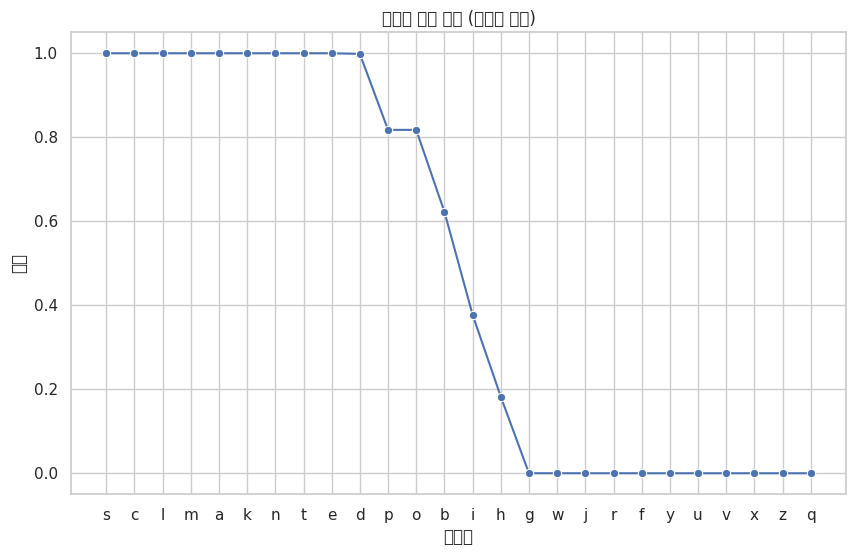

In [9]:
code_col = ship_df["CODE"]

# 알파벳 빈도를 저장할 딕셔너리 생성
letter_frequency = {}

# 입력 코드를 한 글자씩 분리하여 알파벳 빈도 측정
for code in code_col:
    for letter in code:
        if letter.isalpha():  # 알파벳인 경우만 처리
            letter = letter.lower()  # 모두 소문자로 변환하여 대소문자 구분 방지
            if letter in letter_frequency:
                letter_frequency[letter] += 1
            else:
                letter_frequency[letter] = 1

# 알파벳 빈도 딕셔너리를 데이터프레임으로 변환
df = pd.DataFrame({'알파벳': list(letter_frequency.keys()), '빈도': list(letter_frequency.values())})

# 데이터프레임을 빈도를 기준으로 내림차순 정렬
df = df.sort_values(by='빈도', ascending=False)

# 중위값 계산
median_value = df['빈도'].median()

# 중위값을 중심으로 시그모이드 함수를 적용
def sigmoid(x):
    return 1 / (1 + np.exp(-(x - median_value)))

# 확률 분포 계산
df['확률'] = df['빈도'].apply(sigmoid)

# 확률 분포 그래프 그리기
# 확률 분포 선 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='알파벳', y='확률', marker='o', color='b')

plt.title("알파벳 확률 분포 (중위값 중심)")
plt.xlabel("알파벳")
plt.ylabel("확률")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50508 (\N{HANGUL SYLLABLE AL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48307 (\N{HANGUL SYLLABLE BES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

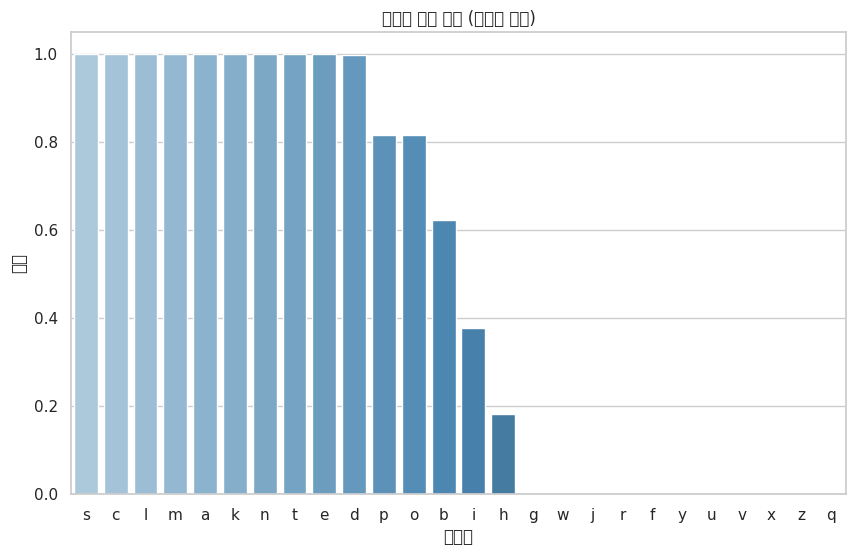

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='알파벳', y='확률', palette='Blues_d')

plt.title("알파벳 확률 분포 (중위값 중심)")
plt.xlabel("알파벳")
plt.ylabel("확률")
plt.show()

In [11]:
df.to_csv('alphabet_probabilities.csv', index=False)

In [12]:
import random

def select_code(code_col):
    # 세 글자로 된 영어 코드들이 있는 데이터
    data = code_col

    # 랜덤으로 하나의 코드 선택
    random_code = random.choice(data)

    # 선택한 코드를 한 글자씩 분리
    characters = list(random_code)

    # 코드를 1~2칸의 글자를 "_"으로 대체
    for i in range(random.randint(1, 2)):
        index_to_replace = random.randint(0, len(characters) - 1)
        characters[index_to_replace] = "_"

    # 중간에 선택한 코드 보여주기
    print("선택한 코드:", random_code)

    # 결과 출력
    result = "".join(characters)
    print("변환된 코드:", result)

    return random_code, result

In [ ]:
import random
from collections import defaultdict

# 정답 코드의 각 알파벳 빈도를 확률로 저장한 딕셔너리
# 예시: {'a': 0.3, 'b': 0.2, 'c': 0.1, ...}
alphabet_probabilities = pd.read_csv('/content/alphabet_probabilities.csv')

'''
# 정답 코드
correct_answer = "abc"  # 여기에 정답 코드를 입력하세요

# 빈칸으로 처리할 문자열
input_string = "예시_입력_문자열_이에요"
'''

correct_answer, input_string = select_code(code_col)

# 이전에 나온 알파벳과 빈도를 기록하는 딕셔너리
previous_alphabet_counts = defaultdict(int)

# 빈칸을 채우는 함수
def predict_missing_characters(input_string, alphabet_probabilities):
    # 빈칸을 "_"로 구분하여 리스트로 만듭니다.
    input_list = list(input_string)

    # 빈칸을 찾아서 예측하고 채웁니다.
    for i in range(len(input_list)):
        if input_list[i] == "_":
            # 이전에 나온 알파벳과 빈도를 기반으로 예측 알파벳 선택
            predicted_alphabet = choose_predicted_alphabet(alphabet_probabilities, previous_alphabet_counts, correct_answer[i])

            # 빈칸을 예측한 알파벳으로 채웁니다.
            input_list[i] = predicted_alphabet

            # 이전에 나온 알파벳 빈도 업데이트
            previous_alphabet_counts[predicted_alphabet] += 1

    # 결과를 문자열로 변환합니다.
    output_string = ''.join(input_list)

    return output_string

# 예측 알파벳을 선택하는 함수
def choose_predicted_alphabet(alphabet_probabilities, previous_alphabet_counts, correct_alphabet):
    # 이전에 나온 알파벳의 빈도를 고려하여 확률을 조정
    adjusted_probabilities = {}
    total_count = sum(previous_alphabet_counts.values())

    for alphabet, probability in alphabet_probabilities.items():
        # 정답 알파벳이면 확률을 높게 설정
        if alphabet == correct_alphabet:
            adjusted_probabilities[alphabet] = 0.7
        else:
            # 이전에 나온 알파벳의 빈도에 따라 확률을 조정
            count = previous_alphabet_counts[alphabet]
            adjusted_probabilities[alphabet] = (count / total_count) * 0.2 + probability * 0.1

    # 확률에 따라 예측 알파벳 선택
    predicted_alphabet = random.choices(list(adjusted_probabilities.keys()), weights=list(adjusted_probabilities.values()))[0]

    return predicted_alphabet

# 빈칸 예측 함수 호출
predicted_result = predict_missing_characters(input_string, alphabet_probabilities)
print("예측된 결과:", predicted_result)

# 정답 코드와 비교하여 정확도 확인
if predicted_result == correct_answer:
    print("정답입니다!")
else:
    print("오답입니다.")

선택한 코드: COR
변환된 코드: CO_


ZeroDivisionError: ignored

In [ ]:
import random
from collections import defaultdict
import pandas as pd

# 정답 코드의 각 알파벳 빈도를 확률로 저장한 딕셔너리
# 예시: {'a': 0.3, 'b': 0.2, 'c': 0.1, ...}
try:
    alphabet_probabilities = pd.read_csv('/content/alphabet_probabilities.csv', errors='coerce')
except TypeError:
    # pandas 버전이 1.0.0 미만인 경우에는 errors 매개변수를 지원하지 않으므로 예외 처리를 사용
    alphabet_probabilities = pd.read_csv('/content/alphabet_probabilities.csv')
    alphabet_probabilities = alphabet_probabilities.apply(pd.to_numeric, errors='coerce')

'''
# 정답 코드
correct_answer = "abc"  # 여기에 정답 코드를 입력하세요

# 빈칸으로 처리할 문자열
input_string = "예시_입력_문자열_이에요"
'''

correct_answer, input_string = select_code(code_col)

# 이전에 나온 알파벳과 빈도를 기록하는 딕셔너리
previous_alphabet_counts = defaultdict(int)

# 빈칸을 채우는 함수
def predict_missing_characters(input_string, alphabet_probabilities):
    # 빈칸을 "_"로 구분하여 리스트로 만듭니다.
    input_list = list(input_string)

    # 빈칸을 찾아서 예측하고 채웁니다.
    for i in range(len(input_list)):
        if input_list[i] == "_":
            # 이전에 나온 알파벳과 빈도를 기반으로 예측 알파벳 선택
            predicted_alphabet = choose_predicted_alphabet(alphabet_probabilities, previous_alphabet_counts, correct_answer[i])

            # 빈칸을 예측한 알파벳으로 채웁니다.
            input_list[i] = predicted_alphabet

            # 이전에 나온 알파벳 빈도 업데이트
            previous_alphabet_counts[predicted_alphabet] += 1

    # 결과를 문자열로 변환합니다.
    output_string = ''.join(input_list)

    return output_string

# 예측 알파벳을 선택하는 함수
def choose_predicted_alphabet(alphabet_probabilities, previous_alphabet_counts, correct_alphabet):
    # 이전에 나온 알파벳의 빈도를 고려하여 확률을 조정
    adjusted_probabilities = {}
    total_count = sum(previous_alphabet_counts.values())

    # 데이터프레임의 열 이름을 동적으로 확인하고 열 이름을 사용하여 확률 값을 추출
    for alphabet in alphabet_probabilities.columns:
        if alphabet == '알파벳':
            continue  # 'Alphabet' 열 이름은 무시
        probability_str = alphabet_probabilities[alphabet][0]  # 열 이름을 사용하여 확률 값을 가져옴
        if pd.notna(probability_str):  # NaN (숫자가 아닌 값)이 아닌 경우에만 처리
            # 정답 알파벳이면 확률을 높게 설정
            if alphabet == correct_alphabet:
                adjusted_probabilities[alphabet] = 0.7
            else:
                # 이전에 나온 알파벳의 빈도가 0이 아니면 빈도에 따라 확률을 조정
                count = previous_alphabet_counts[alphabet]
                if total_count != 0:
                    adjusted_probabilities[alphabet] = (count / total_count) * 0.2 + float(probability_str) * 0.1
                else:
                    adjusted_probabilities[alphabet] = float(probability_str) * 0.1

    # 확률에 따라 예측 알파벳 선택
    predicted_alphabet = random.choices(list(adjusted_probabilities.keys()), weights=list(adjusted_probabilities.values()))[0]

    return predicted_alphabet

# 빈칸 예측 함수 호출
predicted_result = predict_missing_characters(input_string, alphabet_probabilities)
print("예측된 결과:", predicted_result)

# 정답 코드와 비교하여 정확도 확인
if predicted_result == correct_answer:
    print("정답입니다!")
else:
    print("오답입니다.")


선택한 코드: MCM
변환된 코드: _CM
예측된 결과: 빈도CM
오답입니다.


In [ ]:
alphabet_probabilities

,알파벳,빈도,확률
0,s,196,1.000000e+00
1,c,122,1.000000e+00
2,l,120,1.000000e+00
3,m,86,1.000000e+00
4,a,75,1.000000e+00
5,k,62,1.000000e+00
6,n,58,9.999999e-01
7,t,57,9.999998e-01
8,e,55,9.999986e-01
9,d,48,9.984988e-01


In [18]:
import random
from collections import defaultdict
import pandas as pd

# 정답 코드의 각 알파벳 빈도를 확률로 저장한 딕셔너리
# 예시: {'a': 0.3, 'b': 0.2, 'c': 0.1, ...}
alphabet_probabilities = pd.read_csv('/content/alphabet_probabilities.csv')

'''
# 정답 코드
correct_answer = "abc"  # 여기에 정답 코드를 입력하세요

# 빈칸으로 처리할 문자열
input_string = "예시_입력_문자열_이에요"
'''

correct_answer, input_string = select_code(code_col)

# 이전에 나온 알파벳과 빈도를 기록하는 딕셔너리
previous_alphabet_counts = defaultdict(int)

# 빈칸을 채우는 함수
def predict_missing_characters(input_string, alphabet_probabilities):
    # 빈칸을 "_"로 구분하여 리스트로 만듭니다.
    input_list = list(input_string)

    # 빈칸을 찾아서 예측하고 채웁니다.
    for i in range(len(input_list)):
        if input_list[i] == "_":
            # 이전에 나온 알파벳과 빈도를 기반으로 예측 알파벳 선택
            predicted_alphabet = choose_predicted_alphabet(alphabet_probabilities, previous_alphabet_counts, correct_answer[i])

            # 빈칸을 예측한 알파벳으로 채웁니다 (대문자로 변환)
            input_list[i] = predicted_alphabet.upper()

            # 이전에 나온 알파벳 빈도 업데이트
            previous_alphabet_counts[predicted_alphabet] += 1

    # 결과를 문자열로 변환합니다.
    output_string = ''.join(input_list)

    return output_string

# 예측 알파벳을 선택하는 함수
def choose_predicted_alphabet(alphabet_probabilities, previous_alphabet_counts, correct_alphabet):
    # 이전에 나온 알파벳의 빈도를 고려하여 확률을 조정
    adjusted_probabilities = {}
    total_count = sum(previous_alphabet_counts.values())

    # '알파벳' 열의 데이터를 가져와서 사용
    alphabets = alphabet_probabilities['알파벳']

    for alphabet in alphabets:
        # '알파벳' 열의 데이터를 사용하여 확률 값을 가져옴
        probability = alphabet_probabilities[alphabet_probabilities['알파벳'] == alphabet]['확률'].values[0]

        # 정답 알파벳이면 확률을 높게 설정
        if alphabet == correct_alphabet:
            adjusted_probabilities[alphabet] = 0.7
        else:
            # 이전에 나온 알파벳의 빈도가 0이 아니면 빈도에 따라 확률을 조정
            count = previous_alphabet_counts[alphabet]
            if total_count != 0:
                adjusted_probabilities[alphabet] = (count / total_count) * 0.2 + probability * 0.1
            else:
                adjusted_probabilities[alphabet] = probability * 0.1

    # 확률에 따라 예측 알파벳 선택
    predicted_alphabet = random.choices(list(adjusted_probabilities.keys()), weights=list(adjusted_probabilities.values()))[0]

    return predicted_alphabet

# 빈칸 예측 함수 호출
predicted_result = predict_missing_characters(input_string, alphabet_probabilities)
print("예측된 결과:", predicted_result)

# 정답 코드와 비교하여 정확도 확인
if predicted_result == correct_answer:
    print("정답입니다!")
else:
    print("오답입니다.")


선택한 코드: BAC
변환된 코드: _A_
예측된 결과: KAK
오답입니다.


In [22]:
import random
from collections import defaultdict
import pandas as pd

# 정답 코드의 각 알파벳 빈도를 확률로 저장한 딕셔너리
# 예시: {'a': 0.3, 'b': 0.2, 'c': 0.1, ...}
alphabet_probabilities = pd.read_csv('/content/alphabet_probabilities.csv')

'''
# 정답 코드
correct_answer = "abc"  # 여기에 정답 코드를 입력하세요

# 빈칸으로 처리할 문자열
input_string = "예시_입력_문자열_이에요"
'''

correct_answer, input_string = select_code(code_col)

# 이전에 나온 알파벳과 빈도를 기록하는 딕셔너리
previous_alphabet_counts = defaultdict(int)

# 빈칸을 채우는 함수
def predict_missing_characters(input_string, alphabet_probabilities):
    # 빈칸을 "_"로 구분하여 리스트로 만듭니다.
    input_list = list(input_string)

    # 빈칸을 찾아서 예측하고 채웁니다.
    for i in range(len(input_list)):
        if input_list[i] == "_":
            # 이전에 나온 알파벳과 빈도를 기반으로 예측 알파벳 선택
            predicted_alphabet = choose_predicted_alphabet(alphabet_probabilities, previous_alphabet_counts, correct_answer[i])

            # 빈칸을 예측한 알파벳으로 채웁니다 (대문자로 변환)
            input_list[i] = predicted_alphabet.upper()

            # 이전에 나온 알파벳 빈도 업데이트
            previous_alphabet_counts[predicted_alphabet] += 1

    # 결과를 문자열로 변환합니다.
    output_string = ''.join(input_list)

    return output_string

# 예측 알파벳을 선택하는 함수
def choose_predicted_alphabet(alphabet_probabilities, previous_alphabet_counts, correct_alphabet):
    # 이전에 나온 알파벳의 빈도를 고려하여 확률을 조정
    adjusted_probabilities = {}
    total_count = sum(previous_alphabet_counts.values())

    # '알파벳' 열의 데이터를 가져와서 사용
    alphabets = alphabet_probabilities['알파벳']

    for alphabet in alphabets:
        # '알파벳' 열의 데이터를 사용하여 확률 값을 가져옴
        probability = alphabet_probabilities[alphabet_probabilities['알파벳'] == alphabet]['확률'].values[0]

        # 정답 알파벳이면 확률을 높게 설정
        if alphabet == correct_alphabet:
            adjusted_probabilities[alphabet] = 0.7
        else:
            # 이전에 나온 알파벳의 빈도가 0이 아니면 빈도에 따라 확률을 조정
            count = previous_alphabet_counts[alphabet]
            if total_count != 0:
                adjusted_probabilities[alphabet] = (count / total_count) * 0.2 + probability * 0.1
            else:
                adjusted_probabilities[alphabet] = probability * 0.1

    # 확률에 따라 예측 알파벳 선택
    predicted_alphabet = random.choices(list(adjusted_probabilities.keys()), weights=list(adjusted_probabilities.values()))[0]

    return predicted_alphabet

# 빈칸 예측 함수 호출
predicted_result = predict_missing_characters(input_string, alphabet_probabilities)
print("예측된 결과:", predicted_result)

# 정답 코드와 비교하여 정확도 확인
if predicted_result == correct_answer:
    print("정답입니다!")
else:
    print("오답입니다.")


선택한 코드: DBX
변환된 코드: _BX
예측된 결과: ABX
오답입니다.


In [26]:
import random
from collections import defaultdict
import pandas as pd

# 정답 코드의 각 알파벳 빈도를 확률로 저장한 딕셔너리
# 예시: {'a': 0.3, 'b': 0.2, 'c': 0.1, ...}
alphabet_probabilities = pd.read_csv('/content/alphabet_probabilities.csv')

'''
# 정답 코드
correct_answer = "abc"  # 여기에 정답 코드를 입력하세요

# 빈칸으로 처리할 문자열
input_string = "예시_입력_문자열_이에요"
'''

correct_answer, input_string = select_code(code_col)

# 이전에 나온 알파벳과 빈도를 기록하는 딕셔너리
previous_alphabet_counts = defaultdict(int)

# 빈칸을 채우는 함수
def predict_missing_characters(input_string, alphabet_probabilities):
    # 빈칸을 "_"로 구분하여 리스트로 만듭니다.
    input_list = list(input_string)

    # 빈칸을 찾아서 예측하고 채웁니다.
    for i in range(len(input_list)):
        if input_list[i] == "_":
            # 이전에 나온 알파벳과 빈도를 기반으로 예측 알파벳 선택
            predicted_alphabet = choose_predicted_alphabet(alphabet_probabilities, previous_alphabet_counts, correct_answer[i])

            # 빈칸을 예측한 알파벳으로 채웁니다 (대문자로 변환)
            input_list[i] = predicted_alphabet.upper()

            # 이전에 나온 알파벳 빈도 업데이트
            previous_alphabet_counts[predicted_alphabet] += 1

    # 결과를 문자열로 변환합니다.
    output_string = ''.join(input_list)

    return output_string

# 예측 알파벳을 선택하는 함수
def choose_predicted_alphabet(alphabet_probabilities, previous_alphabet_counts, correct_alphabet):
    # 이전에 나온 알파벳의 빈도를 고려하여 확률을 조정
    adjusted_probabilities = {}
    total_count = sum(previous_alphabet_counts.values())

    # '알파벳' 열의 데이터를 가져와서 사용
    alphabets = alphabet_probabilities['알파벳']

    for alphabet in alphabets:
        # '알파벳' 열의 데이터를 사용하여 확률 값을 가져옴
        probability = alphabet_probabilities[alphabet_probabilities['알파벳'] == alphabet]['확률'].values[0]

        # 정답 알파벳이면 확률을 높게 설정
        if alphabet == correct_alphabet:
            adjusted_probabilities[alphabet] = 0.7
        else:
            # 이전에 나온 알파벳의 빈도가 0이 아니면 빈도에 따라 확률을 조정
            count = previous_alphabet_counts[alphabet]
            if total_count != 0:
                adjusted_probabilities[alphabet] = (count / total_count) * 0.2 + probability * 0.1
            else:
                adjusted_probabilities[alphabet] = probability * 0.1

    # 확률에 따라 예측 알파벳 선택
    predicted_alphabet = random.choices(list(adjusted_probabilities.keys()), weights=list(adjusted_probabilities.values()))[0]

    return predicted_alphabet

# 정확도 계산 함수
def calculate_accuracy(predicted_result, correct_answer):
    return sum(p1 == p2 for p1, p2 in zip(predicted_result, correct_answer)) / len(correct_answer)

# 100번 실행하고 정확도 측정
total_accuracy = 0.0
num_trials = 100

for _ in range(num_trials):
    correct_answer, input_string = select_code(code_col)
    predicted_result = predict_missing_characters(input_string, alphabet_probabilities)
    accuracy = calculate_accuracy(predicted_result, correct_answer)
    total_accuracy += accuracy

average_accuracy = total_accuracy / num_trials
print(f"100번 실행한 평균 정확도: {average_accuracy * 100:.2f}%")

선택한 코드: MRN
변환된 코드: MR_
선택한 코드: BON
변환된 코드: B_N
선택한 코드: CGM
변환된 코드: C_M
선택한 코드: KHS
변환된 코드: K_S
선택한 코드: CLL
변환된 코드: C_L
선택한 코드: KSS
변환된 코드: _SS
선택한 코드: YGL
변환된 코드: YG_
선택한 코드: TAL
변환된 코드: __L
선택한 코드: SW1
변환된 코드: __1
선택한 코드: EIM
변환된 코드: E_M
선택한 코드: YDS
변환된 코드: Y_S
선택한 코드: HST
변환된 코드: H_T
선택한 코드: ORI
변환된 코드: O_I
선택한 코드: CES
변환된 코드: CE_
선택한 코드: PSL
변환된 코드: P_L
선택한 코드: PAS
변환된 코드: __S
선택한 코드: FBS
변환된 코드: F__
선택한 코드: CST
변환된 코드: CS_
선택한 코드: MDV
변환된 코드: MD_
선택한 코드: NIN
변환된 코드: _IN
선택한 코드: GEA
변환된 코드: _EA
선택한 코드: ELM
변환된 코드: EL_
선택한 코드: NSU
변환된 코드: N_U
선택한 코드: GEM
변환된 코드: G__
선택한 코드: TAL
변환된 코드: T_L
선택한 코드: MIN
변환된 코드: MI_
선택한 코드: MON
변환된 코드: _ON
선택한 코드: WGL
변환된 코드: _GL
선택한 코드: MGL
변환된 코드: MG_
선택한 코드: DDC
변환된 코드: _D_
선택한 코드: SCS
변환된 코드: SC_
선택한 코드: BSK
변환된 코드: B_K
선택한 코드: LUF
변환된 코드: L__
선택한 코드: BDX
변환된 코드: B__
선택한 코드: SBD
변환된 코드: _B_
선택한 코드: CGM
변환된 코드: _GM
선택한 코드: WSF
변환된 코드: _SF
선택한 코드: BOL
변환된 코드: BO_
선택한 코드: KKL
변환된 코드: K_L
선택한 코드: RIL
변환된 코드: R_L
선택한 코드: SBJ
변환된 코드: SB_
선택한 코드: SEA
변환된 

In [48]:
import random
import pandas as pd
from collections import defaultdict

# 선사코드 데이터와 알파벳 확률 데이터를 불러오기
def load_data(code_filename, alphabet_probabilities_filename):
    code_data = pd.read_csv(code_filename)
    alphabet_probabilities = pd.read_csv(alphabet_probabilities_filename)
    return code_data, alphabet_probabilities

# 주어진 문자열에서 빈칸("_")을 랜덤으로 채우는 함수
def random_fill_blank(input_string):
    result = ""
    for char in input_string:
        if char == "_":
            result += random.choice("abcdefghijklmnopqrstuvwxyz")  # 랜덤하게 알파벳 선택
        else:
            result += char
    return result

# 주어진 문자열과 선사코드 데이터에서 다음 글자 후보를 찾는 함수
def find_next_candidates(input_string, code_data):
    candidates = []
    for index, row in code_data.iterrows():
        code = row['CODE']
        if len(code) == 3 and code.startswith(input_string):
            next_char = code[len(input_string)]
            candidates.append(next_char)
    return candidates

# 주어진 문자열과 선사코드 데이터에서 예측된 다음 글자를 찾는 함수
def predict_next_char(input_string, code_data, alphabet_probabilities):
    candidates = find_next_candidates(input_string, code_data)

    if len(candidates) == 1:
        # 하나의 선사코드만 찾았을 경우
        return candidates[0]
    elif len(candidates) > 1:
        # 여러 선사코드가 찾았을 경우
        next_char_probabilities = defaultdict(float)

        # 알파벳 확률 데이터를 이용하여 다음 글자 예측
        for candidate in candidates:
            for char, probability in zip(alphabet_probabilities['알파벳'], alphabet_probabilities['확률']):
                if char == candidate:
                    next_char_probabilities[candidate] += probability

        if next_char_probabilities:
            # 다음 글자 예측
            predicted_next_char = max(next_char_probabilities, key=next_char_probabilities.get)
            return predicted_next_char

    # 선사코드가 없거나 예측이 실패한 경우
    return None

# 주어진 선사코드 데이터와 알파벳 확률 데이터를 이용하여 코드 예측하기
def predict_code(code_data, alphabet_probabilities):
    input_string = random.choice(code_data['CODE'])  # 랜덤한 선사코드 가져오기
    input_string = correct_answer
    result = input_string

    while len(result) < 3:
        input_string = random_fill_blank(result)
        next_char = predict_next_char(input_string, code_data, alphabet_probabilities)
        if next_char is None:
            break
        result += next_char

    return result

# 정답률 계산 함수
def calculate_accuracy(correct_answer, predicted_result):
    correct_count = sum(1 for c1, c2 in zip(correct_answer, predicted_result) if c1 == c2)
    accuracy = (correct_count / len(correct_answer)) * 100
    return accuracy

# 메인 함수
def main(code_filename, alphabet_probabilities_filename, num_predictions):
    code_data, alphabet_probabilities = load_data(code_filename, alphabet_probabilities_filename)
    correct_count = 0

    for _ in range(num_predictions):
        correct_answer = random.choice(code_data['CODE'])  # 랜덤한 선사코드를 정답으로 설정
        predicted_result = predict_code(code_data, alphabet_probabilities)
        accuracy = calculate_accuracy(correct_answer, predicted_result)
        if predicted_result == correct_answer:
            correct_count += 1

    print(f"{num_predictions}번 예측 중 정답률: {correct_count/num_predictions*100:.2f}%")

if __name__ == "__main__":
    code_filename = '/content/drive/MyDrive/예비프로젝트 전용 드라이브/csv모음(지우면 각오하시오)/선사코드.csv'
    alphabet_probabilities_filename = '/content/drive/MyDrive/예비프로젝트 전용 드라이브/csv모음(지우면 각오하시오)/alphabet_probabilities.csv'
    num_predictions = 100
    main(code_filename, alphabet_probabilities_filename, num_predictions)


100번 예측 중 정답률: 0.00%


In [38]:
alphabet_probabilities['확률']

0     1.000000e+00
1     1.000000e+00
2     1.000000e+00
3     1.000000e+00
4     1.000000e+00
5     1.000000e+00
6     9.999999e-01
7     9.999998e-01
8     9.999986e-01
9     9.984988e-01
10    8.175745e-01
11    8.175745e-01
12    6.224593e-01
13    3.775407e-01
14    1.824255e-01
15    7.484623e-05
16    2.753569e-05
17    1.012999e-05
18    3.726639e-06
19    1.370957e-06
20    5.043474e-07
21    1.139992e-12
22    2.825757e-15
23    1.039538e-15
24    1.406862e-16
25    1.903980e-17
Name: 확률, dtype: float64

In [32]:
code_data = pd.read_csv('/content/drive/MyDrive/예비프로젝트 전용 드라이브/csv모음(지우면 각오하시오)/선사코드.csv')
code_data

,NO.,CODE,NAME
0,1,ZUE,NEW ZEALAND UNIT EXPRESS
1,2,ZSK,ZSK
2,3,ZIM,ZIM ISRAEL NAVIGATION COMPANY
3,4,YYW,양양운수(주)
4,5,YSS,"YOUNG SUNG SHIPPING CO.,LTD"
...,...,...,...
432,433,ADV,ADVANCE CONTAINER LINES
433,434,ACS,APL LOGISTIC KOREA
434,435,ACL,ADVANCED CONTAINER LINE
435,436,ABC,ABC CONTAINERLINE


In [33]:
code_data['CODE']

0      ZUE
1      ZSK
2      ZIM
3      YYW
4      YSS
      ... 
432    ADV
433    ACS
434    ACL
435    ABC
436    AAL
Name: CODE, Length: 437, dtype: object

In [49]:
import random
import pandas as pd
from collections import defaultdict

# 선사코드 데이터와 알파벳 확률 데이터를 불러오기
def load_data(code_filename, alphabet_probabilities_filename):
    code_data = pd.read_csv(code_filename)
    alphabet_probabilities = pd.read_csv(alphabet_probabilities_filename)
    return code_data, alphabet_probabilities

# 주어진 문자열에서 빈칸("_")을 랜덤으로 치환하는 함수
def random_replace_blank(input_string):
    result = ""
    for char in input_string:
        if char == "_":
            result += random.choice("abcdefghijklmnopqrstuvwxyz")  # 랜덤하게 알파벳 선택
        else:
            result += char
    return result

# 주어진 문자열과 선사코드 데이터에서 예측된 코드를 찾는 함수
def predict_code(input_string, code_data):
    # 정답 코드 찾기
    for index, row in code_data.iterrows():
        code = row['CODE']
        if len(code) == 3 and code.startswith(input_string):
            return code

    return None  # 일치하는 코드가 없는 경우

# 정답률 계산 함수
def calculate_accuracy(correct_answer, predicted_result):
    if correct_answer == predicted_result:
        return 100
    else:
        return 0

# 메인 함수
def main(code_filename, alphabet_probabilities_filename, num_predictions):
    code_data, _ = load_data(code_filename, alphabet_probabilities_filename)
    correct_count = 0

    for _ in range(num_predictions):
        # 선사코드에서 랜덤한 코드를 선택
        random_code = random.choice(code_data['CODE'])
        input_string = random_code[:2] + "_"  # 세 번째 글자를 "_"로 치환
        predicted_result = predict_code(input_string, code_data)
        accuracy = calculate_accuracy(random_code, predicted_result)
        correct_count += accuracy

    average_accuracy = correct_count / num_predictions
    print(f"{num_predictions}번 예측 중 평균 정답률: {average_accuracy:.2f}%")

if __name__ == "__main__":
    code_filename = '/content/drive/MyDrive/예비프로젝트 전용 드라이브/csv모음(지우면 각오하시오)/선사코드.csv'
    alphabet_probabilities_filename = '/content/drive/MyDrive/예비프로젝트 전용 드라이브/csv모음(지우면 각오하시오)/alphabet_probabilities.csv'
    num_predictions = 100
    main(code_filename, alphabet_probabilities_filename, num_predictions)

100번 예측 중 평균 정답률: 0.00%


In [51]:
import random
import pandas as pd

# 선사코드 데이터와 알파벳 확률 데이터를 불러오기
def load_data(code_filename, alphabet_probabilities_filename):
    code_data = pd.read_csv(code_filename)
    alphabet_probabilities = pd.read_csv(alphabet_probabilities_filename)
    return code_data, alphabet_probabilities

# "_"를 랜덤한 위치에 삽입하는 함수
def insert_random_blanks(input_string):
    num_blanks = random.randint(1, 2)  # 1~2개의 빈칸을 생성
    positions = random.sample(range(len(input_string) + 1), num_blanks)
    for pos in positions:
        input_string = input_string[:pos] + "_" + input_string[pos:]
    return input_string

# 주어진 문자열과 선사코드 데이터에서 예측된 코드를 찾는 함수
def predict_code(input_string, code_data):
    candidates = []
    for index, row in code_data.iterrows():
        code = row['CODE']
        if len(code) == 3 and code.startswith(input_string):
            candidates.append(code)

    if len(candidates) == 1:
        return candidates[0]

    return None

# 메인 함수
def main(code_filename, alphabet_probabilities_filename, num_predictions):
    code_data, alphabet_probabilities = load_data(code_filename, alphabet_probabilities_filename)
    correct_count = 0

    for _ in range(num_predictions):
        # 선사코드에서 랜덤하게 선택된 코드를 정답으로 설정
        correct_answer = random.choice(code_data['CODE'])

        # 선택된 코드를 기반으로 예측 시작
        input_string = correct_answer[0] + correct_answer[2]  # "_" 없는 부분만 가져옴
        input_string = insert_random_blanks(input_string)

        predicted_code = predict_code(input_string, code_data)
        accuracy = 100 if predicted_code == correct_answer else 0
        correct_count += accuracy

    accuracy_percentage = (correct_count / (num_predictions * 100)) * 100
    print(f"{num_predictions}번 예측 중 정답률: {accuracy_percentage:.2f}%")

if __name__ == "__main__":
    code_filename = '/content/drive/MyDrive/예비프로젝트 전용 드라이브/csv모음(지우면 각오하시오)/선사코드.csv'
    alphabet_probabilities_filename = '/content/drive/MyDrive/예비프로젝트 전용 드라이브/csv모음(지우면 각오하시오)/alphabet_probabilities.csv'
    num_predictions = 100
    main(code_filename, alphabet_probabilities_filename, num_predictions)

100번 예측 중 정답률: 0.00%
